<a href="https://colab.research.google.com/github/hyeeeeeon/ProblemSolving/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Download

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("razanaqvi14/real-and-fake-news")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/real-and-fake-news


column: title, text, subject, date

In [31]:
import pandas as pd
import os

csv = pd.read_csv(os.path.join(path, "Fake.csv"))
fake_df = pd.DataFrame(csv)

csv = pd.read_csv(os.path.join(path, "True.csv"))
real_df = pd.DataFrame(csv)

In [32]:
# Download latest version
path = kagglehub.dataset_download("jillanisofttech/fake-or-real-news")

print("Path to dataset files:", path)

csv = pd.read_csv(os.path.join(path, "fake_or_real_news.csv"))

test_df = pd.DataFrame(csv)

Path to dataset files: /kaggle/input/fake-or-real-news


# title 단어 빈도 수 비교

In [33]:
import pandas as pd

# 각 파일에서 제목만 불러오기
#fake_title = fake_df['title'].dropna()
#real_title = real_df['title'].dropna()

# label 컬럼 추가해서 합치기 (비교용)
fake_df['label'] = 'FAKE'
real_df['label'] = 'REAL'

# 합치기
df = pd.concat([fake_df, real_df], ignore_index=True)

In [34]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['title_char_count'] = df['title'].apply(lambda x: len(x))

## 단어 수 비교

In [35]:
print(df.head())
print(df.index)
print(df.columns)

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  title_word_count  title_char_count  
0  December 31, 2017  FAKE                12                79  
1  December 31, 2017  FAKE                 8                69  
2  December 30, 2017  FAKE                15                90  
3  December 29, 20

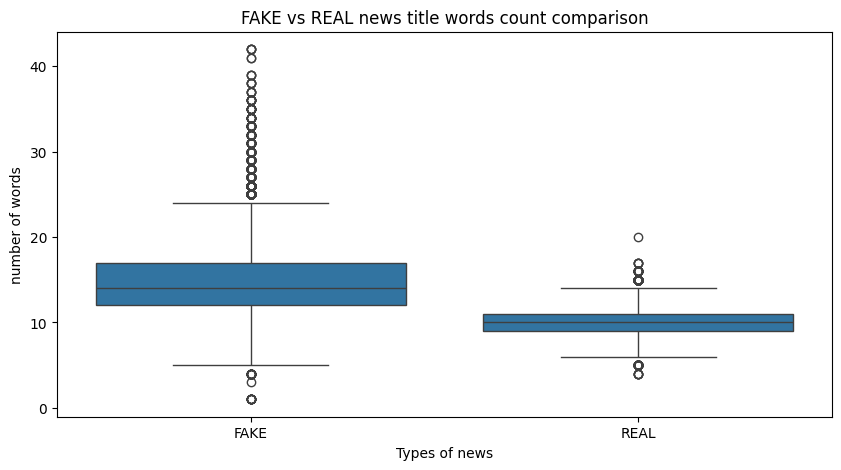

In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='title_word_count', data=df)
plt.title("FAKE vs REAL news title words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

## 단어 수 분포 겹치기

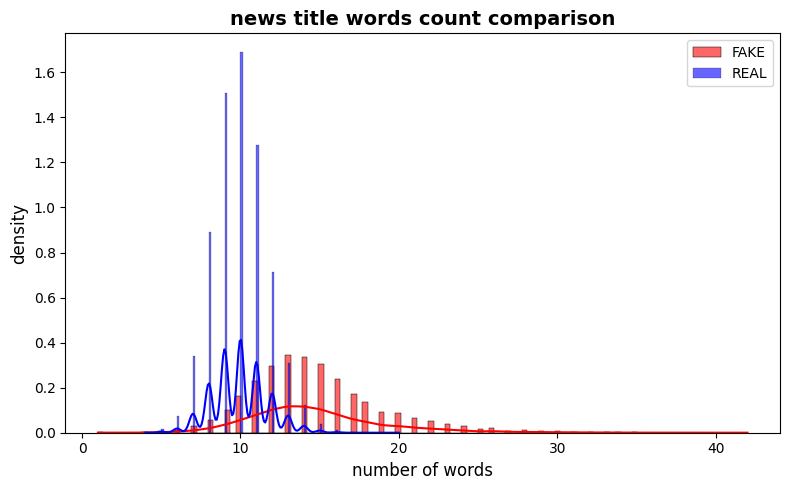

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['title_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['title_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 평균 단어 수 막대그래프 + 수치 표시

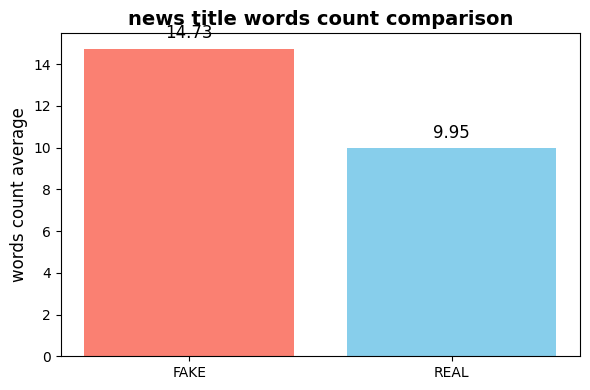

In [38]:
# 평균값 계산
avg_words = df.groupby('label')['title_word_count'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['title_word_count'], color=['salmon', 'skyblue'])

# 수치 텍스트 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# text 단어 빈도 수 비교

## 단어 수 비교

In [39]:
import pandas as pd

# 각 파일에서 제목만 불러오기
fake_text = fake_df['text'].dropna()
real_text = real_df['text'].dropna()

# label 컬럼 추가해서 합치기 (비교용)
fake_text['label'] = 'FAKE'
real_text['label'] = 'REAL'

# 합치기
df = pd.concat([fake_df, real_df], ignore_index=True)

df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['text_char_count'] = df['text'].apply(lambda x: len(x))

## 단어 수 분포 겹치기

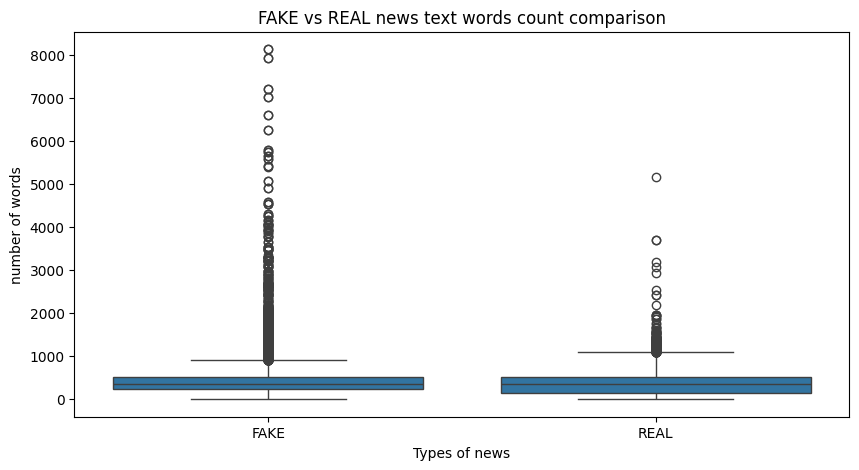

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='text_word_count', data=df)
plt.title("FAKE vs REAL news text words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

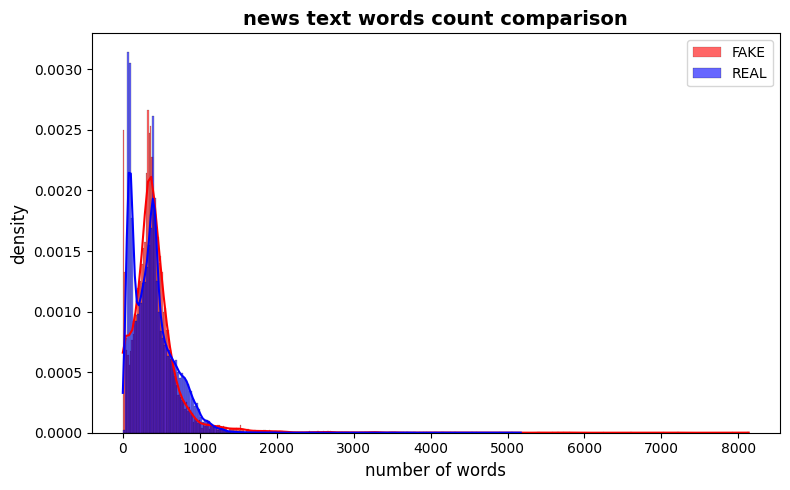

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['text_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['text_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 평균 단어 수 막대그래프 + 수치 표시

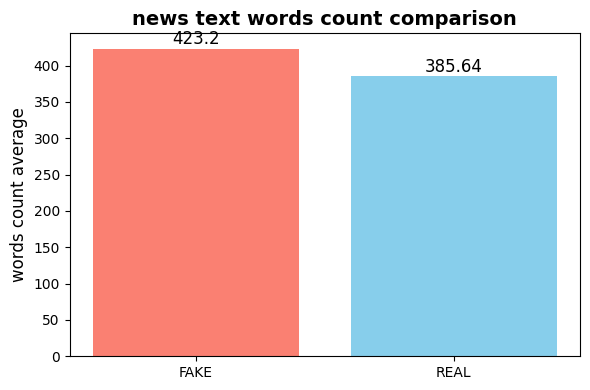

In [42]:
# 평균값 계산
avg_words = df.groupby('label')['text_word_count'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['text_word_count'], color=['salmon', 'skyblue'])

# 수치 텍스트 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# 감정 단어 분석
: 자극적이거나 클릭을 유도하는 단어 분석

In [43]:
import pandas as pd
from collections import Counter
import re

# 기본 정제 함수
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# 데이터프레임에서 단어 리스트 만들기
def extract_words(df, label):
    words = []
    for title in df[df['label'] == label]['title'].dropna():
        words.extend(clean_and_tokenize(title))
    return words

# 단어 리스트 추출
fake_words = extract_words(df, 'FAKE')
real_words = extract_words(df, 'REAL')

# 빈도수 계산
fake_counts = Counter(fake_words)
real_counts = Counter(real_words)

In [44]:
# FAKE 단어가 REAL보다 몇 배 더 많은지 계산
word_ratio_data = []
for word in fake_counts:
    fake_count = fake_counts[word]
    real_count = real_counts.get(word, 0.5)  # 0이면 0.5로 보정
    ratio = fake_count / real_count
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

# DataFrame으로 정리 (사람이 해석할 수 있도록)
ratio_df = pd.DataFrame(word_ratio_data, columns=['word', 'fake_count', 'real_count', 'fake_to_real_ratio', 'total_count'])

# 최소 등장 기준으로 필터링
filtered_df = ratio_df[ratio_df['total_count'] >= 10].sort_values(by='fake_to_real_ratio', ascending=False)

# 상위 30개만 출력
print("📌 Words that often appear only in the fake news Top 30")
display(filtered_df.head(30))


📌 Words that often appear only in the fake news Top 30


,word,fake_count,real_count,fake_to_real_ratio,total_count
3155,hillarys,418,0.5,836.00000,418.5
5889,wow,372,0.5,744.00000,372.5
349,hilarious,262,0.5,524.00000,262.5
622,heres,245,0.5,490.00000,245.5
18245,boiler,205,0.5,410.00000,205.5
5473,lol,189,0.5,378.00000,189.5
10693,yr,179,0.5,358.00000,179.5
659,busted,179,0.5,358.00000,179.5
18246,ep,171,0.5,342.00000,171.5
2264,bombshell,166,0.5,332.00000,166.5


fake에 많이 나오는 단어 수를 가지고 real에서 얼마나 나오나 비교했는데 real에는 거의 안나오는 경우가 많아 비율이 다 크게 나옴...

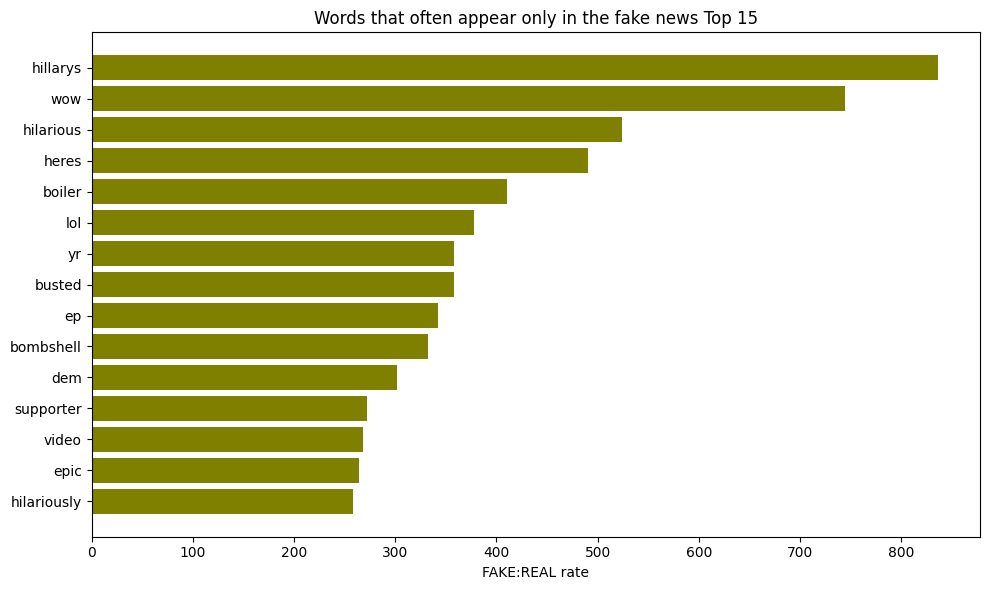

In [45]:
import matplotlib.pyplot as plt

top_words = filtered_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['fake_to_real_ratio'], color='olive')
plt.xlabel("FAKE:REAL rate")
plt.title("Words that often appear only in the fake news Top 15")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


FAKE와 REAL에 모두 등장하는 단어만 비교

In [46]:
# 두쪽에 모두 등장한 단어만 추출
common_words = set(fake_counts.keys()) & set(real_counts.keys())

word_ratio_data = []
for word in common_words:
    fake_count = fake_counts[word]
    real_count = real_counts[word]
    ratio = fake_count / (real_count + 1e-5)  # 보정값 아주 작게
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

In [47]:
# word_ratio_data: [(word, fake_count, real_count, ratio, total), ...]
common_df = pd.DataFrame(
    word_ratio_data,
    columns=["word", "fake_count", "real_count", "fake_to_real_ratio", "total_count"]
)

# 분석을 명확하게 하기 위해 최소 등장 횟수 필터링 (예: 5회 이상)
common_df = common_df[common_df['total_count'] >= 5]

# 비율 기준 정렬
common_df = common_df.sort_values(by='fake_to_real_ratio', ascending=False)


<ipython-input-48-951a6e040f62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')


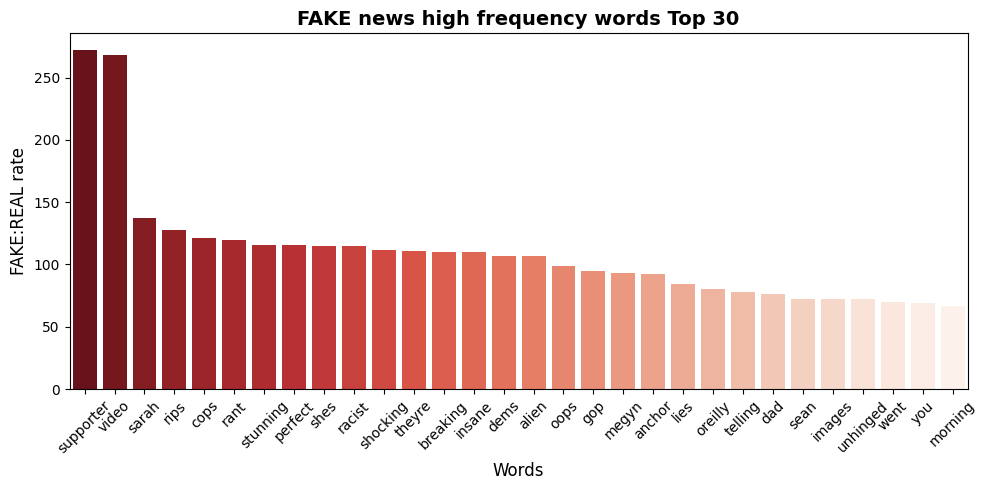

In [48]:
# 상위 30개 단어 시각화
top_words = common_df.head(30)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')
plt.title("FAKE news high frequency words Top 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("FAKE:REAL rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


비율이 아니라 "비율 차이"가 큰 단어를 정규화해서 추출

In [49]:
# 전체 단어 수
total_fake_words = sum(fake_counts.values())
total_real_words = sum(real_counts.values())

# 정규화된 비율 비교
word_ratio_data = []
for word in set(fake_counts.keys()) | set(real_counts.keys()):
    fake_freq = fake_counts[word] / total_fake_words
    real_freq = real_counts.get(word, 0) / total_real_words
    ratio = fake_freq / (real_freq + 1e-6)  # 비율 대비
    total = fake_counts[word] + real_counts.get(word, 0)
    word_ratio_data.append((word, fake_counts[word], real_counts.get(word, 0), ratio, total))


In [50]:
# 리스트 → DataFrame 변환
norm_df = pd.DataFrame(
    word_ratio_data,
    columns=['word', 'fake_count', 'real_count', 'normalized_fake_to_real_ratio', 'total_count']
)

# 필터링: 너무 적게 등장한 단어 제외 (예: 총 5회 이상 등장)
norm_df = norm_df[norm_df['total_count'] >= 5]

# 정렬: 비율이 높은 순
norm_df = norm_df.sort_values(by='normalized_fake_to_real_ratio', ascending=False)


<ipython-input-51-507ed5100b51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')


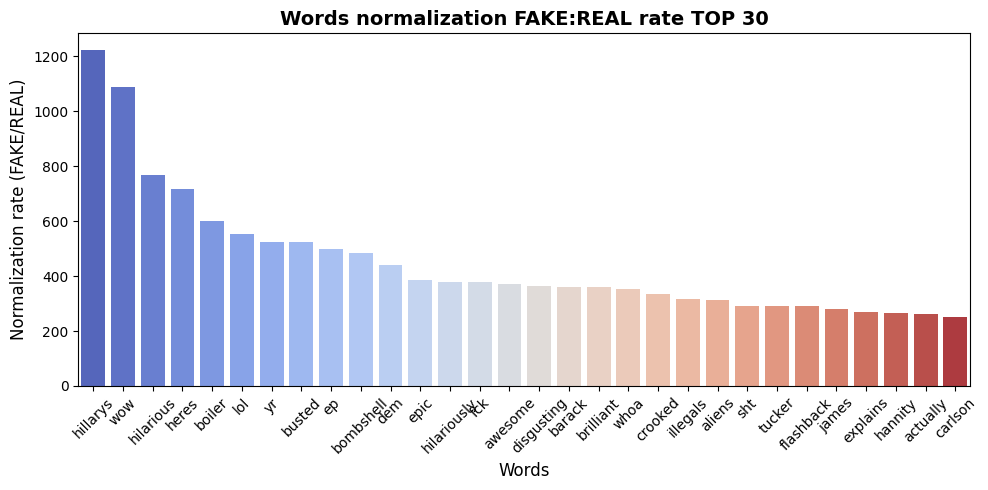

In [51]:
# 상위 30개 단어 선택
top_norm = norm_df.head(30)

# 막대그래프 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')

plt.title("Words normalization FAKE:REAL rate TOP 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Normalization rate (FAKE/REAL)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


이렇게 해도 둘 다 비슷하게 단어 사용이 되어서 처음부터 타이틀 감정 분석을 해보기로 함

In [52]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 처음 한 번만 실행 필요
nltk.download('vader_lexicon')

# 감성 분석기 객체 생성
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [53]:
# 뉴스 제목 감성 점수 계산 (compound: 종합 감정 점수)
df['sentiment_score'] = df['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# 감성 점수 해석 (선택사항: 범주화)
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


<ipython-input-54-786b99bdef0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})


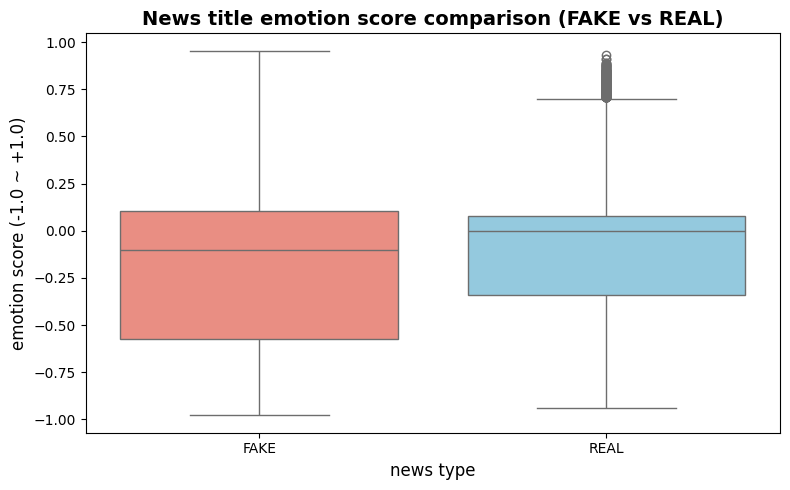

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("news type", fontsize=12)
plt.ylabel("emotion score (-1.0 ~ +1.0)", fontsize=12)
plt.tight_layout()
plt.show()

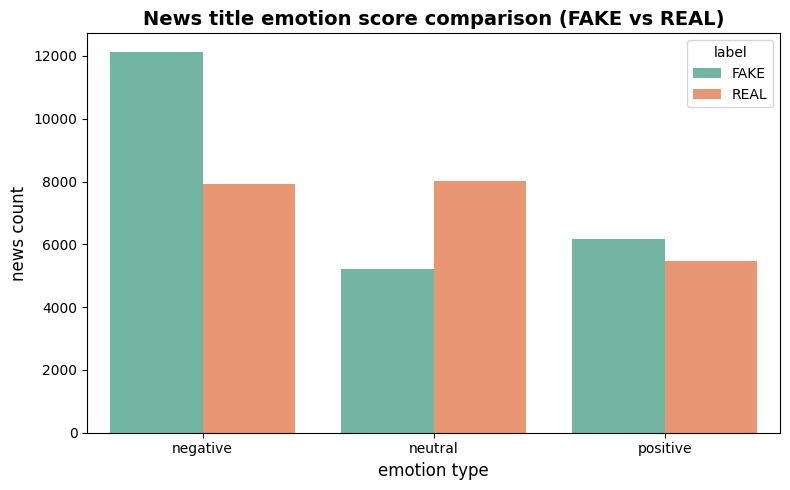

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', hue='label', palette='Set2')
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("emotion type", fontsize=12)
plt.ylabel("news count", fontsize=12)
plt.tight_layout()
plt.show()

In [69]:
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import pos_tag, word_tokenize

# 처음 한 번만 실행
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [70]:
# 주요 품사 태그
POS_MAP = {
    'Noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjective': ['JJ', 'JJR', 'JJS']
}


In [71]:
def extract_pos_from_texts(text_list, target_pos):
    all_words = []
    for sentence in text_list.dropna():
        tokens = word_tokenize(str(sentence))
        tagged = pos_tag(tokens)
        all_words += [word.lower() for word, tag in tagged if tag in POS_MAP[target_pos]]
    return Counter(all_words)


In [72]:
# 예: 명사
title_nouns = extract_pos_from_texts(df['title'], 'Noun')
text_nouns = extract_pos_from_texts(df['text'], 'Noun')

# 동사
title_verbs = extract_pos_from_texts(df['title'], 'Verb')
text_verbs = extract_pos_from_texts(df['text'], 'Verb')

# 형용사
title_adjs = extract_pos_from_texts(df['title'], 'Adjective')
text_adjs = extract_pos_from_texts(df['text'], 'Adjective')


In [73]:
def compare_pos_freq(title_counter, text_counter, top_n=20):
    words = set(title_counter.keys()) | set(text_counter.keys())
    data = []
    for word in words:
        data.append({
            'word': word,
            'title_count': title_counter.get(word, 0),
            'text_count': text_counter.get(word, 0),
            'diff': title_counter.get(word, 0) - text_counter.get(word, 0)
        })
    df_comp = pd.DataFrame(data)
    return df_comp.sort_values(by='diff', ascending=False).head(top_n)


In [74]:
noun_diff_df = compare_pos_freq(title_nouns, text_nouns)
verb_diff_df = compare_pos_freq(title_verbs, text_verbs)
adj_diff_df = compare_pos_freq(title_adjs, text_adjs)


<ipython-input-75-83bd18b1812a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='word', y='diff', palette='coolwarm')


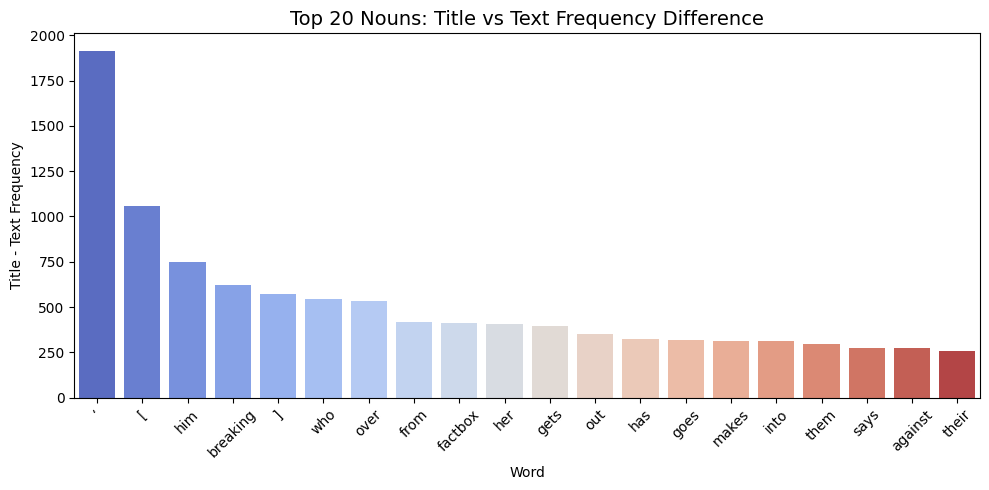

<ipython-input-75-83bd18b1812a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='word', y='diff', palette='coolwarm')


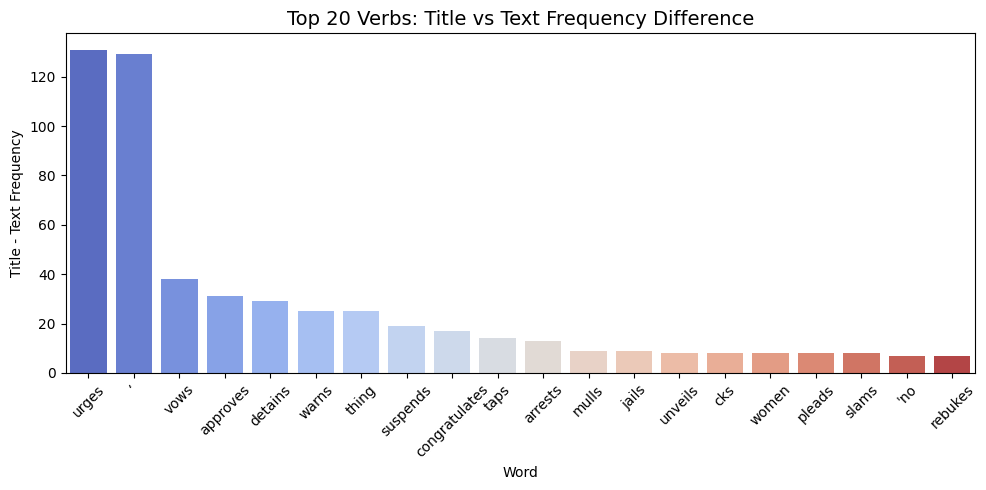

<ipython-input-75-83bd18b1812a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='word', y='diff', palette='coolwarm')


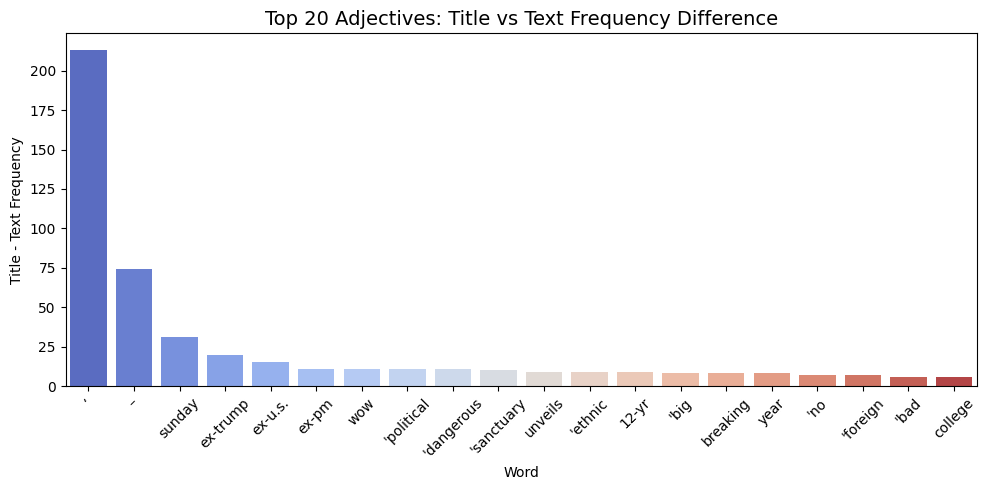

In [75]:
def plot_pos_diff(df, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='word', y='diff', palette='coolwarm')
    plt.title(title, fontsize=14)
    plt.xlabel("Word")
    plt.ylabel("Title - Text Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_pos_diff(noun_diff_df, "Top 20 Nouns: Title vs Text Frequency Difference")
plot_pos_diff(verb_diff_df, "Top 20 Verbs: Title vs Text Frequency Difference")
plot_pos_diff(adj_diff_df, "Top 20 Adjectives: Title vs Text Frequency Difference")


In [76]:
def extract_pos_words(text_list, pos_type):
    words = []
    for text in text_list.dropna():
        tokens = word_tokenize(str(text))
        tagged = pos_tag(tokens)
        words += [word.lower() for word, tag in tagged if tag in POS_MAP[pos_type]]
    return Counter(words).most_common(15)  # 상위 15개만


In [77]:
# FAKE와 REAL 분리
df_fake = df[df['label'] == 'FAKE']
df_real = df[df['label'] == 'REAL']

# 품사별 단어 추출
results = {
    'FAKE_title': {},
    'FAKE_text': {},
    'REAL_title': {},
    'REAL_text': {}
}

for pos_type in ['Noun', 'Verb', 'Adjective']:
    results['FAKE_title'][pos_type] = extract_pos_words(df_fake['title'], pos_type)
    results['FAKE_text'][pos_type] = extract_pos_words(df_fake['text'], pos_type)
    results['REAL_title'][pos_type] = extract_pos_words(df_real['title'], pos_type)
    results['REAL_text'][pos_type] = extract_pos_words(df_real['text'], pos_type)


KeyboardInterrupt: 